C:\Users\AJ Stangl\AppData\Local\Temp\ipykernel_24568\267629531.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = Image.open(requests.get(url, stream=True).raw).resize((512, 512), Image.ANTIALIAS)
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_t

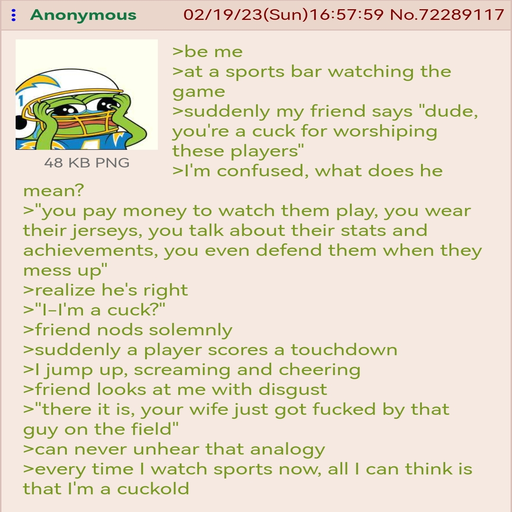

'CHANGE'

In [14]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, CLIPImageProcessor
from PIL import Image
import requests
url = "https://i.redd.it/agtthspqi5ja1.jpg"
# load image from the IAM database (actually this model is meant to be used on printed text)
image = Image.open(requests.get(url, stream=True).raw).resize((512, 512), Image.ANTIALIAS)

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')
model.config.image_processor = CLIPImageProcessor.from_pretrained('openai/clip-vit-base-patch32')

pixel_values = processor(images=image, return_tensors="pt").pixel_values

device = 'cpu'

model.to(device)

generated_ids = model.generate(pixel_values, max_length=128, do_sample=True, num_beams=4, early_stopping=True, num_return_sequences=10)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

display(image)

display(generated_text)